Accuracy: 1.0000
Cross-validation scores: [1.         0.9695122  1.         0.99390244 0.92682927]
Average CV score: 0.9780

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



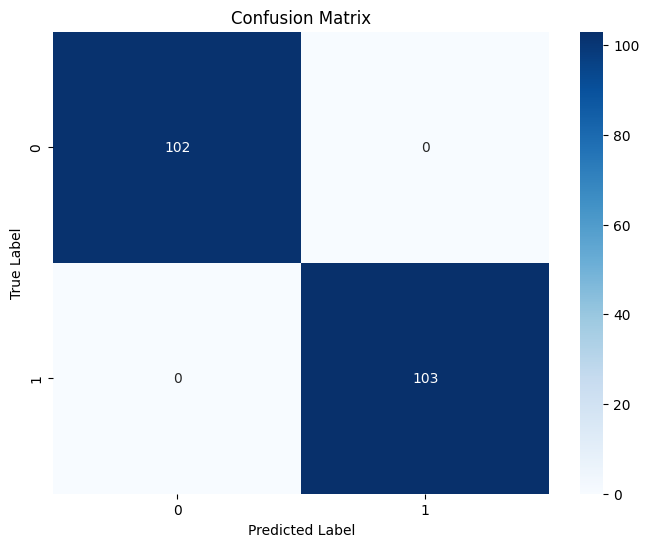

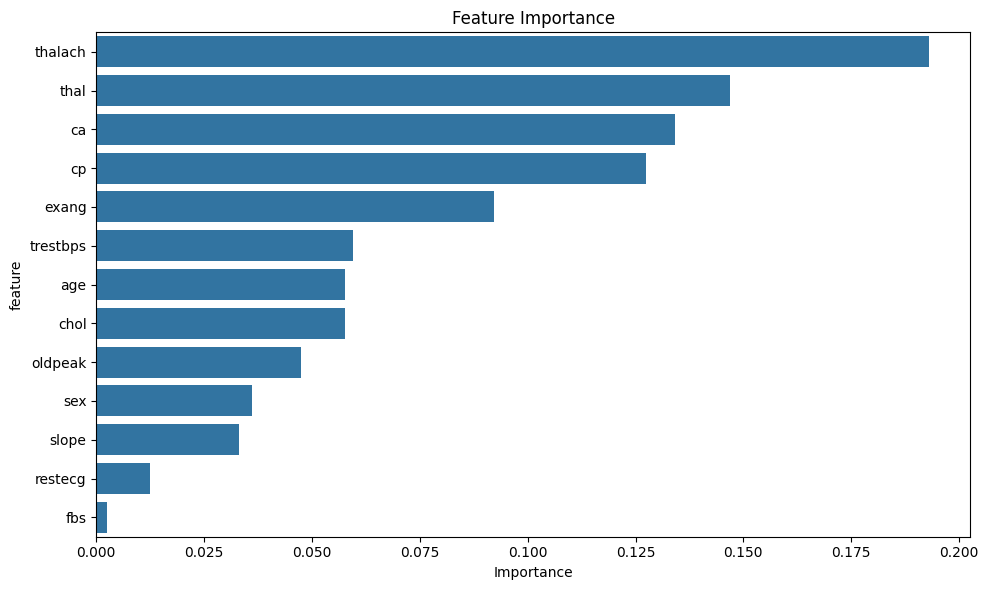


Top 5 Most Important Features:
    feature  importance
7   thalach    0.192962
12     thal    0.146968
11       ca    0.134170
2        cp    0.127343
8     exang    0.092211


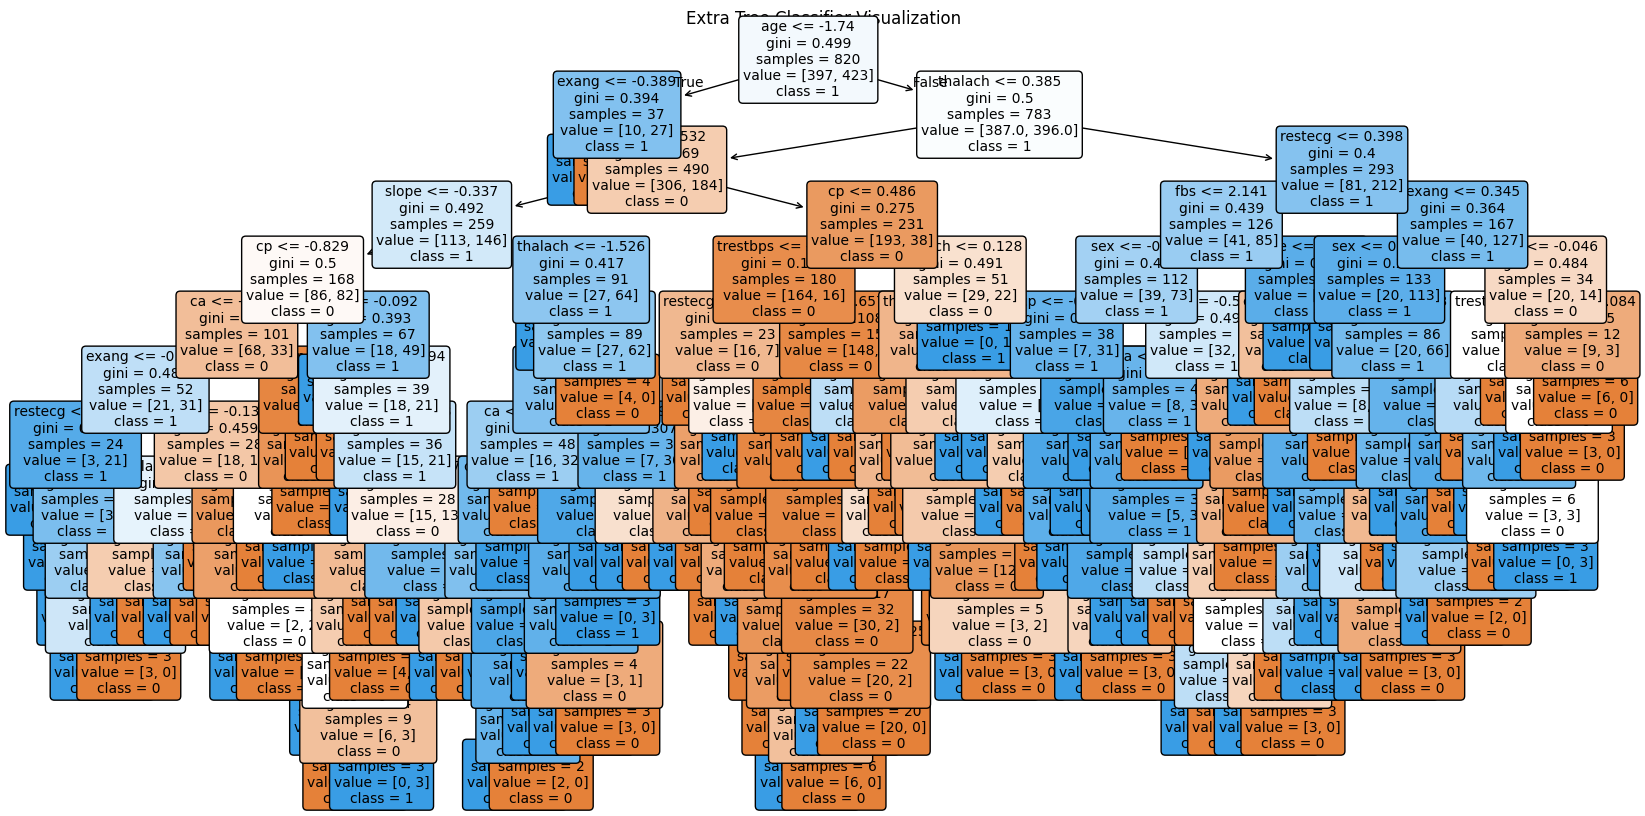

In [4]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare data
data = pd.read_csv('heart.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train ExtraTreeClassifier
etc = ExtraTreeClassifier(random_state=42)
etc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = etc.predict(X_test_scaled)
y_pred_prob = etc.predict_proba(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
cv_scores = cross_val_score(etc, X_train_scaled, y_train, cv=5)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance plot
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': etc.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

# Print top 5 most important features
print("\nTop 5 Most Important Features:")
print(feature_importance.head())

# Decision tree visualization (optional)
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(etc, feature_names=X.columns, class_names=['0', '1'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Extra Tree Classifier Visualization")
plt.show()

In [6]:
import joblib
model_filename = 'heart_disease_classification_model.pkl'
joblib.dump(etc, model_filename)
print(f"Model saved as {model_filename}")

Model saved as heart_disease_classification_model.pkl
